# 01. Load the Data

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 02. Explore Columns & Data Types

In [2]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [3]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [4]:
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
print(df.describe().T)

               count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.1274

# 03. Convert Date Column + Decide Target + Prepare Features

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

In [8]:
target = 'Weekly_Sales'
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
            'CPI', 'Unemployment', 'Year', 'Month', 'Week']

In [9]:
X = df[features]
y = df[target]

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


# 04. Train/Test Split + Scaling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5148, 9)
X_test shape: (1287, 9)
y_train shape: (5148,)
y_test shape: (1287,)


# 05. Train KNN Regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

In [16]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [17]:
knn_pred = knn.predict(X_test_scaled)
print("First 5 KNN Predictions:", knn_pred[:5])

First 5 KNN Predictions: [1136443.07  1178564.75  1453194.368  978941.058  624099.786]


# 06. Train SVR Regressor

In [18]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1)

In [19]:
svr.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [20]:
svr_pred = svr.predict(X_test_scaled)
print("First 5 SVR Predictions:", svr_pred[:5])

First 5 SVR Predictions: [962561.21734337 962464.67718154 962118.15708694 964788.42130883
 950459.67092127]


# 07. Evaluate Models

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [22]:
def evaluate_model(y_true, y_pred, name):
    print(f"=== {name} Evaluation ===")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-"*40)

In [23]:
# Evaluate KNN
evaluate_model(y_test, knn_pred, "KNN Regressor")

=== KNN Regressor Evaluation ===
MAE: 260349.12550271946
MSE: 146676499547.93198
RMSE: 382983.6805242907
R² Score: 0.5447014705047166
----------------------------------------


In [24]:
# Evaluate SVR
evaluate_model(y_test, svr_pred, "SVR Regressor")

=== SVR Regressor Evaluation ===
MAE: 469288.12957099173
MSE: 328944918190.63
RMSE: 573537.1986110666
R² Score: -0.02107793681153325
----------------------------------------


# 08. Plot Predictions vs Actual

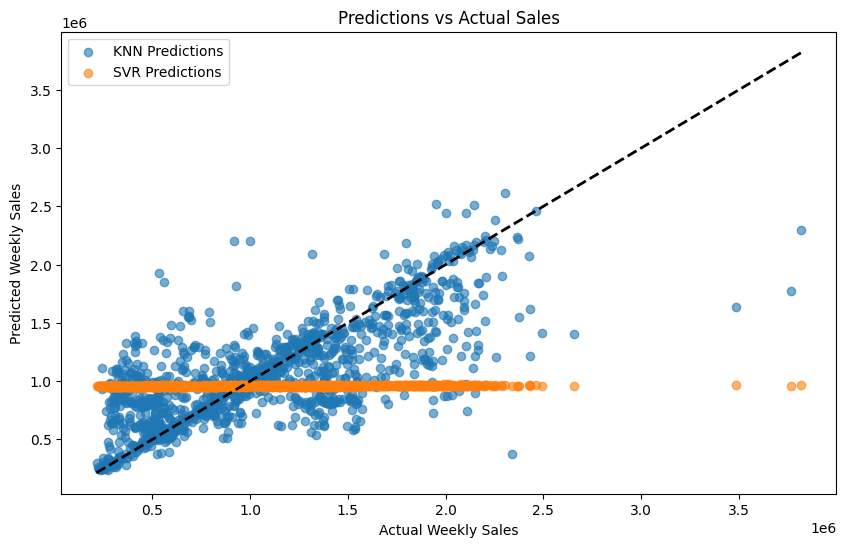

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, knn_pred, label="KNN Predictions", alpha=0.6)
plt.scatter(y_test, svr_pred, label="SVR Predictions", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Predictions vs Actual Sales")
plt.legend()
plt.show()

# 09. Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

### Tuning KNN

In [27]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

In [28]:
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='r2')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [29]:
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN R² Score (CV):", knn_grid.best_score_)

Best KNN Params: {'n_neighbors': 3, 'weights': 'distance'}
Best KNN R² Score (CV): 0.5555615160974262


In [30]:
knn_best_pred = knn_grid.predict(X_test_scaled)

### Tuning SVR

In [31]:
svr_param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}

In [32]:
svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2')
svr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 0.5],
                         'kernel': ['rbf']},
             scoring='r2')

In [33]:
print("Best SVR Params:", svr_grid.best_params_)
print("Best SVR R² Score (CV):", svr_grid.best_score_)

Best SVR Params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVR R² Score (CV): -0.017868788958162973


In [34]:
svr_best_pred = svr_grid.predict(X_test_scaled)

### Evaluate tuned models

In [35]:
evaluate_model(y_test, knn_best_pred, "Best KNN Regressor")

=== Best KNN Regressor Evaluation ===
MAE: 230550.2753839346
MSE: 131514456792.02739
RMSE: 362649.2200350462
R² Score: 0.591765968172607
----------------------------------------


In [36]:
evaluate_model(y_test, svr_best_pred, "Best SVR Regressor")

=== Best SVR Regressor Evaluation ===
MAE: 469288.12957099173
MSE: 328944918190.63
RMSE: 573537.1986110666
R² Score: -0.02107793681153325
----------------------------------------


# 10. Save Tuned KNN Model & Scaler

In [37]:
import joblib

joblib.dump(knn, "knn_walmart_model.pkl")
joblib.dump(scaler, "scaler_walmart.pkl")

['scaler_walmart.pkl']